# Data Extraction for 20CR

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr


### Globals

In [2]:
# Define reduced size window
BASE_LAT_START = 67
BASE_LAT_END = 36
BASE_LON_START = -22
BASE_LON_END = 41

### Load data

In [3]:
ds_ta = xr.load_dataset('tmp2m.20w40e.30n70n.1807.nc')

In [4]:
ds_ta

<xarray.Dataset> Size: 583MB
Dimensions:          (LON485_570: 86, LAT171_228: 58, bnds: 2, HEIGHT: 1,
                      AX007: 365, ENSEMBLE: 80)
Coordinates:
  * LON485_570       (LON485_570) float64 688B 340.3 341.0 341.7 ... 399.4 400.1
  * LAT171_228       (LAT171_228) float64 464B 29.82 30.53 31.23 ... 69.12 69.82
  * HEIGHT           (HEIGHT) float64 8B 2.0
  * AX007            (AX007) datetime64[ns] 3kB 1807-01-01T12:00:00 ... 1807-...
  * ENSEMBLE         (ENSEMBLE) float64 640B 1.0 2.0 3.0 4.0 ... 78.0 79.0 80.0
Dimensions without coordinates: bnds
Data variables:
    LAT171_228_bnds  (LAT171_228, bnds) float64 928B 29.47 30.18 ... 69.47 70.18
    TMP2M            (ENSEMBLE, AX007, HEIGHT, LAT171_228, LON485_570) float32 583MB ...
Attributes:
    history:      FERRET V7.2 (optimized) 29-Nov-21
    Conventions:  CF-1.6

### Dimension Overview

In [5]:
print(f"Time dim: {len(ds_ta.AX007)}")
print(f"Ensembles: {len(ds_ta.ENSEMBLE)}")
print(f"Lat: {len(ds_ta.LAT171_228)}")
print(f"Lon: {len(ds_ta.LON485_570)}")

Time dim: 365
Ensembles: 80
Lat: 58
Lon: 86


### Values

In [6]:
# TIME
print(f"Time 0: {ds_ta.AX007[0].to_numpy()}")
print(f"Time 1: {ds_ta.AX007[1].to_numpy()}")
print(f"Time -1: {ds_ta.AX007[-1].to_numpy()}")

Time 0: 1807-01-01T12:00:00.000000000
Time 1: 1807-01-02T12:00:00.000000000
Time -1: 1807-12-31T12:00:00.000000000


In [7]:
# ENSEMBLE
print(f"Ensemble 0: {ds_ta.ENSEMBLE[0].to_numpy()}")
print(f"Ensemble 1: {ds_ta.ENSEMBLE[1].to_numpy()}")
print(f"Ensemble -1: {ds_ta.ENSEMBLE[-1].to_numpy()}")

Ensemble 0: 1.0
Ensemble 1: 2.0
Ensemble -1: 80.0


In [8]:
# LATITUDE
print(f"Lat 0: {ds_ta.LAT171_228[0].to_numpy()}")
print(f"Lat 1: {ds_ta.LAT171_228[1].to_numpy()}")
print(f"Lat 2: {ds_ta.LAT171_228[2].to_numpy()}")
print(f"Lat -1: {ds_ta.LAT171_228[-1].to_numpy()}")
print()
print(f"Delta 0-1: {abs(ds_ta.LAT171_228[0].to_numpy() - ds_ta.LAT171_228[1].to_numpy())}")
print(f"Delta 1-2: {abs(ds_ta.LAT171_228[1].to_numpy() - ds_ta.LAT171_228[2].to_numpy())}")

#BASE_LAT_START = 67
#BASE_LAT_END = 36

Lat 0: 29.824498999163094
Lat 1: 30.52625160109792
Lat 2: 31.2280041770759
Lat -1: 69.82426517058262

Delta 0-1: 0.7017526019348246
Delta 1-2: 0.7017525759779808


In [9]:
# LONGITUDE
print(f"Lon 0: {ds_ta.LON485_570[0].to_numpy()}")
print(f"Lon 1: {ds_ta.LON485_570[1].to_numpy()}")
print(f"Lon 2: {ds_ta.LON485_570[2].to_numpy()}")
print(f"Lon -1: {ds_ta.LON485_570[-1].to_numpy()}")
print()
print(f"Lon 0-1: {abs(ds_ta.LON485_570[0].to_numpy() - ds_ta.LON485_570[1].to_numpy())}")
print(f"Lon 1-2: {abs(ds_ta.LON485_570[1].to_numpy() - ds_ta.LON485_570[2].to_numpy())}")

#BASE_LON_START = -22
#BASE_LON_END = 41

print()
print(f"Lon 0: {ds_ta.LON485_570[0].to_numpy() -360}")
print(f"Lon -1: {ds_ta.LON485_570[-1].to_numpy() -360}")


Lon 0: 340.3125
Lon 1: 341.015625
Lon 2: 341.71875
Lon -1: 400.078125

Lon 0-1: 0.703125
Lon 1-2: 0.703125

Lon 0: -19.6875
Lon -1: 40.078125


In [10]:
# TEMPERATURE
print(ds_ta['TMP2M'].to_numpy().shape)
print(f"Raw member 0. (Kelvin?)")
print(np.max(ds_ta['TMP2M'].to_numpy()[0]))
print(np.min(ds_ta['TMP2M'].to_numpy()[0]))
print(f"Member 0. (°C?)")
print(np.max(ds_ta['TMP2M'].to_numpy()[0] - 273.15))
print(np.min(ds_ta['TMP2M'].to_numpy()[0] - 273.15))

print("Ensemble mean (°C?)")
ens_mean_ta = np.mean(ds_ta['TMP2M'].to_numpy(), axis=0)
print(ens_mean_ta.shape)
print(np.max(ens_mean_ta - 273.15))
print(np.min(ens_mean_ta - 273.15))

(80, 365, 1, 58, 86)
Raw member 0. (Kelvin?)
327.7
230.3
Member 0. (°C?)
54.55002
-42.84999
Ensemble mean (°C?)
(365, 1, 58, 86)
43.33371
-21.939957


In [11]:
# Verify that this does the same as above..
print(np.max(ds_ta.mean(dim="ENSEMBLE")['TMP2M'].to_numpy() - 273.15))
print(np.min(ds_ta.mean(dim="ENSEMBLE")['TMP2M'].to_numpy() - 273.15))

43.33371
-21.939957


In [12]:
ta_ens_mean = ds_ta.mean(dim="ENSEMBLE")['TMP2M'] - 273.15
ta_ens_mean['LON485_570'] = ta_ens_mean.LON485_570 - 360 
print(ta_ens_mean.shape)

(365, 1, 58, 86)


### Save field

In [80]:
from scipy.ndimage import zoom

In [81]:
ta_ens_mean_mat = ta_ens_mean[:, 0, ::-1, :]
ta_ens_mean_mat = ta_ens_mean_mat[:, 5:48]
ta_ens_mean_mat = zoom(ta_ens_mean_mat, (1.0, 32 / ta_ens_mean_mat.shape[1], 64 / ta_ens_mean_mat.shape[2]))
np.save("ta_20cr_mean.npy", ta_ens_mean_mat)
ta_ens_mean_mat.shape

(365, 32, 64)

(365, 32, 64, 2)
(365, 32, 64)


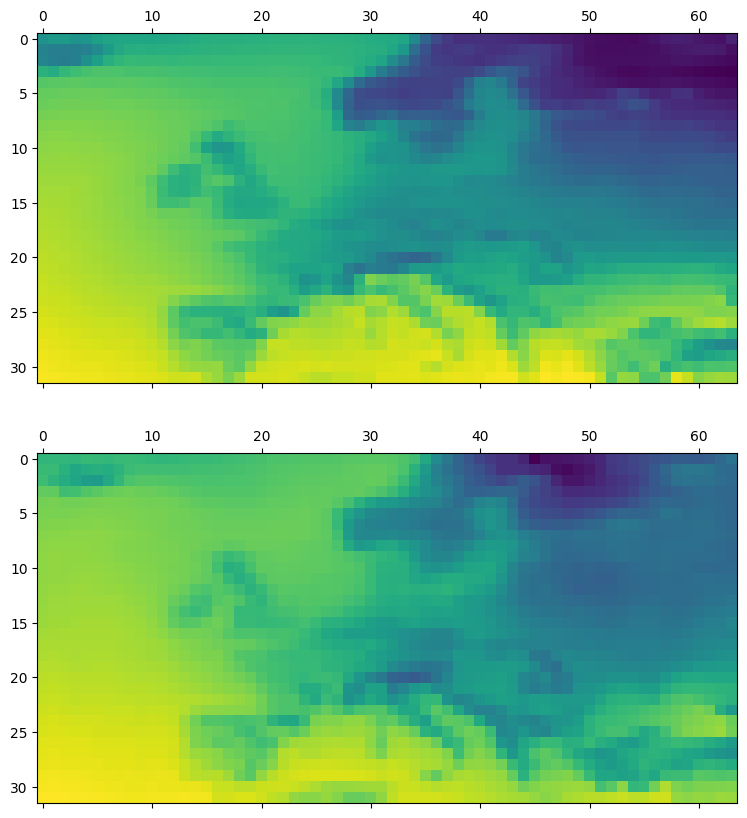

In [78]:
my_ta = np.load("../predictions/full_pred_plain.npy")
print(my_ta.shape)


fig, axs = plt.subplots(2,1, figsize=(10,10))
axs[0].matshow(ta_ens_mean_mat[0])
axs[1].matshow(my_ta[0, ..., 0])

print(ta_ens_mean_mat.shape)

In [46]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import pandas as pd

from src.config import BASE_LAT_START, BASE_LAT_END, BASE_LON_START, BASE_LON_END
import cartopy.crs as ccrs

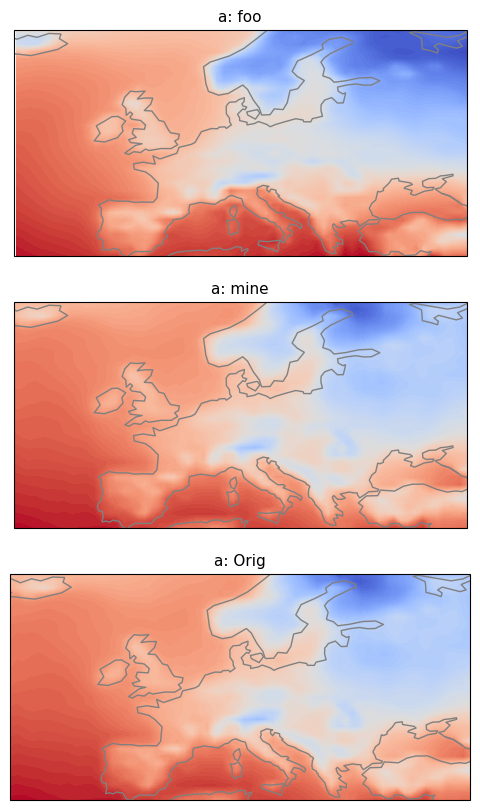

In [79]:
fig, axs = plt.subplots(3,1, figsize=(10, 10), subplot_kw={'projection': ccrs.PlateCarree()})

BASE_LAT_START = 67
BASE_LAT_END = 36

BASE_LON_START = -22
BASE_LON_END = 41


lon = np.linspace(BASE_LON_START+1.4, BASE_LON_END, 64)
lat = np.linspace(BASE_LAT_START, BASE_LAT_END, 32)

axs[0].set_extent((BASE_LON_START+1, BASE_LON_END, BASE_LAT_START, BASE_LAT_END), crs=ccrs.PlateCarree())
axs[0].coastlines(resolution='110m', color='gray')
axs[0].set_title("a: " + "foo", fontsize=11)
contourf_1 = axs[0].contourf(lon, lat, ta_ens_mean_mat[0], transform=ccrs.PlateCarree(), levels=100, cmap='coolwarm')
    #                 tuple (left, bottom, width, height)
#sub_ax_1 = fig.add_axes([0.5, 0.53, 0.02, 0.35])
#fig.colorbar(contourf_1, cax=sub_ax_1, extend='both')


lon2 = np.linspace(BASE_LON_START+1, BASE_LON_END, 63)
lat2 = np.linspace(BASE_LAT_START, BASE_LAT_END, 32)

axs[1].set_extent((BASE_LON_START+1, BASE_LON_END, BASE_LAT_START, BASE_LAT_END), crs=ccrs.PlateCarree())
axs[1].coastlines(resolution='110m', color='gray')
axs[1].set_title("a: " + "mine", fontsize=11)
contourf_2 = axs[1].contourf(lon2, lat2, my_ta[0, :, 1:, 0], transform=ccrs.PlateCarree(), levels=100, cmap='coolwarm')


lon3 = np.linspace(BASE_LON_START, BASE_LON_END, 64)
lat3 = np.linspace(BASE_LAT_START, BASE_LAT_END, 32)

axs[2].set_extent((BASE_LON_START, BASE_LON_END, BASE_LAT_START, BASE_LAT_END), crs=ccrs.PlateCarree())
axs[2].coastlines(resolution='110m', color='gray')
axs[2].set_title("a: " + "Orig", fontsize=11)
contourf_3 = axs[2].contourf(lon3, lat3, my_ta[0, ..., 0], transform=ccrs.PlateCarree(), levels=100, cmap='coolwarm')


### Extract time seris

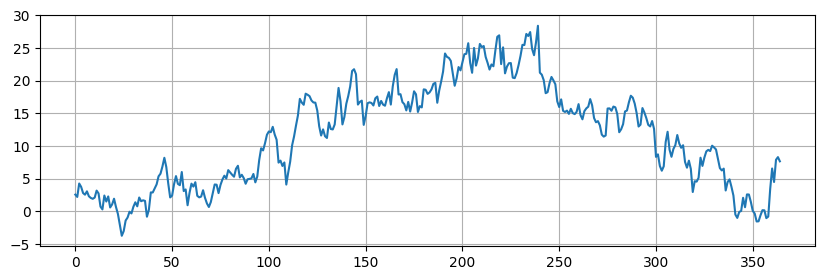

In [18]:
# Central Belgium (CBT)
# LAT: 50.85
# LON: 4.35
cbt_lat = 50.85
cbt_lon = 4.35
# closest_cbt_lon = 4.21875
# closest_cbt_lat = 50.877059

# lats = ta_ens_mean.LAT171_228.to_numpy()
# lons = ta_ens_mean.LON485_570.to_numpy()
# tryout_lats = lats[np.where((lats <= LAT_START) & (lats > LAT_END))]
# tryout_lons = lons[np.where((lons >= LON_START) & (lons < LON_END))]

cbt_ta = ta_ens_mean.sel({'LAT171_228': cbt_lat, 
                          'LON485_570': cbt_lon}, method='nearest').to_numpy()[:, 0]

fig, ax = plt.subplots(1,1, figsize=(10,3))
ax.plot(cbt_ta)
plt.grid(True)

np.save("cbt_ta.npy", cbt_ta)

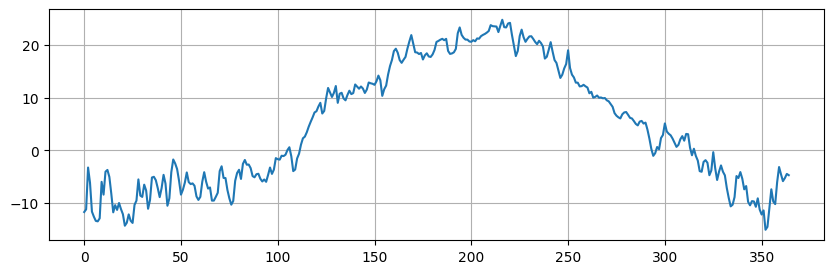

In [19]:
stp_lat = 59.93
stp_lon = 30.27

stp_ta = ta_ens_mean.sel({'LAT171_228': stp_lat, 
                          'LON485_570': stp_lon}, method='nearest').to_numpy()[:, 0]

fig, ax = plt.subplots(1,1, figsize=(10,3))
ax.plot(stp_ta)
plt.grid(True)


np.save("stp_ta.npy", stp_ta)

## SLP

In [82]:
ds_slp = xr.load_dataset('prmsl.20w40e.30n70n.1807.nc')
ds_slp

<xarray.Dataset> Size: 583MB
Dimensions:          (LON485_570: 86, LAT171_228: 58, bnds: 2, AX006: 365,
                      ENSEMBLE: 80)
Coordinates:
  * LON485_570       (LON485_570) float64 688B 340.3 341.0 341.7 ... 399.4 400.1
  * LAT171_228       (LAT171_228) float64 464B 29.82 30.53 31.23 ... 69.12 69.82
  * AX006            (AX006) datetime64[ns] 3kB 1807-01-01T12:00:00 ... 1807-...
  * ENSEMBLE         (ENSEMBLE) float64 640B 1.0 2.0 3.0 4.0 ... 78.0 79.0 80.0
Dimensions without coordinates: bnds
Data variables:
    LAT171_228_bnds  (LAT171_228, bnds) float64 928B 29.47 30.18 ... 69.47 70.18
    PRMSL            (ENSEMBLE, AX006, LAT171_228, LON485_570) float32 583MB ...
Attributes:
    history:      FERRET V7.2 (optimized) 29-Nov-21
    Conventions:  CF-1.6

In [84]:
print(f"Time dim: {len(ds_slp.AX006)}")
print(f"Ensembles: {len(ds_slp.ENSEMBLE)}")
print(f"Lat: {len(ds_slp.LAT171_228)}")
print(f"Lon: {len(ds_slp.LON485_570)}")

Time dim: 365
Ensembles: 80
Lat: 58
Lon: 86


In [86]:
# PRESSURE
print(ds_slp['PRMSL'].to_numpy().shape)
print(f"Raw member 0. (Pa)")
print(np.max(ds_slp['PRMSL'].to_numpy()[0]))
print(np.min(ds_slp['PRMSL'].to_numpy()[0]))

(80, 365, 58, 86)
Raw member 0. (Pa)
104951.0
94250.0


In [91]:
slp_ens_mean = ds_slp.mean(dim="ENSEMBLE")['PRMSL']
slp_ens_mean['LON485_570'] = slp_ens_mean.LON485_570 - 360 
print(slp_ens_mean.shape)

(365, 58, 86)


### Save field

In [92]:
slp_ens_mean_mat = slp_ens_mean[:, ::-1, :]
slp_ens_mean_mat = slp_ens_mean_mat[:, 5:48]
slp_ens_mean_mat = zoom(slp_ens_mean_mat, (1.0, 32 / slp_ens_mean_mat.shape[1], 64 / slp_ens_mean_mat.shape[2]))
np.save("slp_20cr_mean.npy", slp_ens_mean_mat)
slp_ens_mean_mat.shape

(365, 32, 64)